# Introducción a Geopandas

es un proyecto de código abierto para facilitar el trabajo con datos geoespaciales en python. GeoPandas amplía los tipos de datos utilizados por pandas para permitir operaciones espaciales en tipos geométricos. Las operaciones geométricas son realizadas por shapely. Geopandas depende además de fiona para el acceso a los archivos y de matplotlib para el trazado.

Hay varios formatos de datos GIS diferentes disponibles, como Shapefile, GeoJSON, KML y GPKG. Geopandas es capaz de leer datos de todos estos formatos (y muchos más).

El objetivo de GeoPandas es facilitar el trabajo con datos geoespaciales en python. Combina las capacidades de pandas y shapely, proporcionando operaciones geoespaciales en pandas y una interfaz de alto nivel para múltiples geometrías para shapely. GeoPandas le permite realizar fácilmente operaciones en python que de otro modo requerirían una base de datos espacial como PostGIS.

In [26]:
import geopandas as gpd

In [27]:
newdata = gpd.GeoDataFrame()

In [28]:
type(newdata)

geopandas.geodataframe.GeoDataFrame

In [29]:
newdata

""


In [30]:
# crear una geometria dentro geodataframe
newdata["geometry"] = None

In [31]:
newdata

,geometry


In [32]:
# Importar shapely
from shapely.geometry import Polygon

In [33]:
# Coordenadas en grados decimales
coordinates = [(-75.037610,  -8.300693),
               (-75.023229,  -8.298556),
               (-75.022900,  -8.308375),
               (-75.037684,  -8.308330),]

In [34]:
type(coordinates)

list

In [35]:
# Crear poligono mediante shapely de una lista
poly = Polygon(coordinates)

In [36]:
# Check el poligono
print(poly)

POLYGON ((-75.03761 -8.300693, -75.023229 -8.298556, -75.0229 -8.308375, -75.037684 -8.30833, -75.03761 -8.300693))


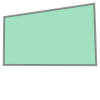

In [37]:
poly

In [38]:
# Insertar el poligono en la geometria columna 0
newdata.at[0, "geometry"] = poly

In [39]:
newdata

,geometry
0,"POLYGON ((-75.03761 -8.30069, -75.02323 -8.298..."


## Crear un nueva columna y insertar dato

In [40]:
newdata.at[0, "Nombre"] = "GEOMATICA"

# Let's check the data
print(newdata)

                                            geometry     Nombre
0  POLYGON ((-75.03761 -8.30069, -75.02323 -8.298...  GEOMATICA


## Verificación de la proyeccion

In [41]:
print(newdata.crs)

None


In [42]:
newdata = gpd.GeoDataFrame.set_crs(newdata, crs=4326)

In [43]:
newdata.crs.name

'WGS 84'

<AxesSubplot: >

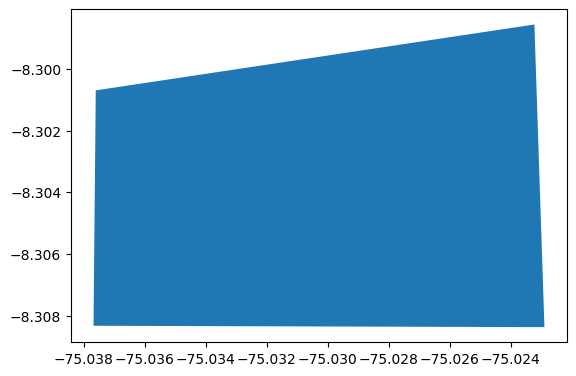

In [44]:
newdata.plot()

## Ruta a exportar shapefile

In [45]:
import os

In [46]:
os.getcwd()

'E:\\Python\\02_SIG_Python\\Resultado'

In [47]:
ruta_archivos = r"E:\Python\02_SIG_Python\Resultado"
os.chdir(ruta_archivos) # Cambiar ruta trabajo
os.getcwd() # Consultar ruta trabajo

'E:\\Python\\02_SIG_Python\\Resultado'

In [49]:
# Determine the output path for the Shapefile
outfp = "Poligono_creado.shp"

# Exportar el dato shapefile
newdata.to_file(outfp)